<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/decison_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
#load the necessary dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [5]:
#Train test split method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
#Logistic regression
log_reg = LogisticRegression(multi_class = 'ovr')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [8]:
#Decision tree
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred_log = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)

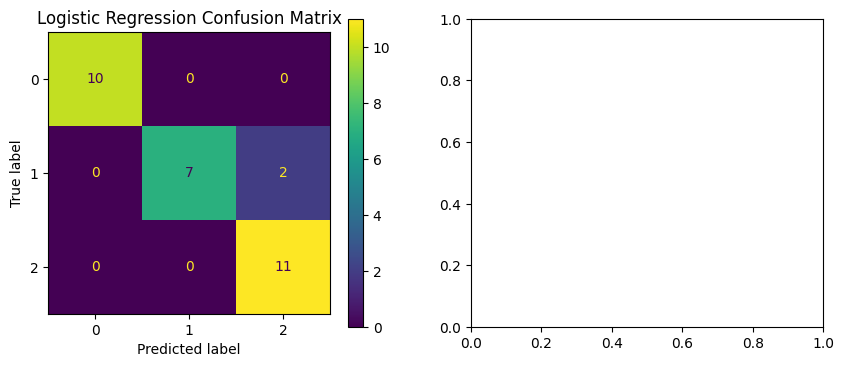

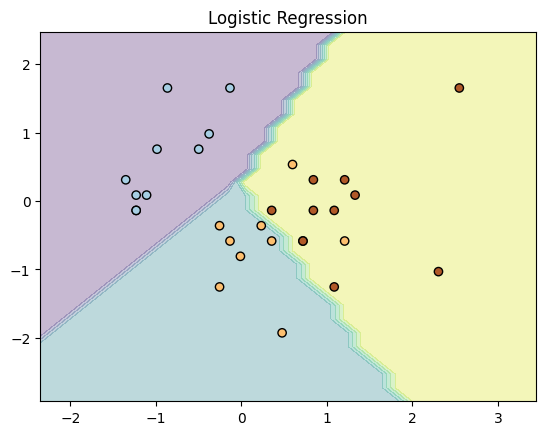

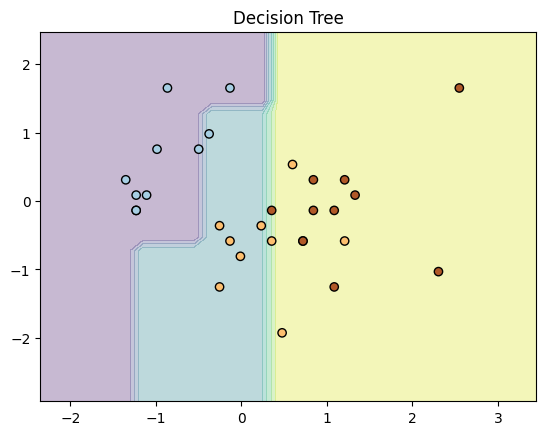

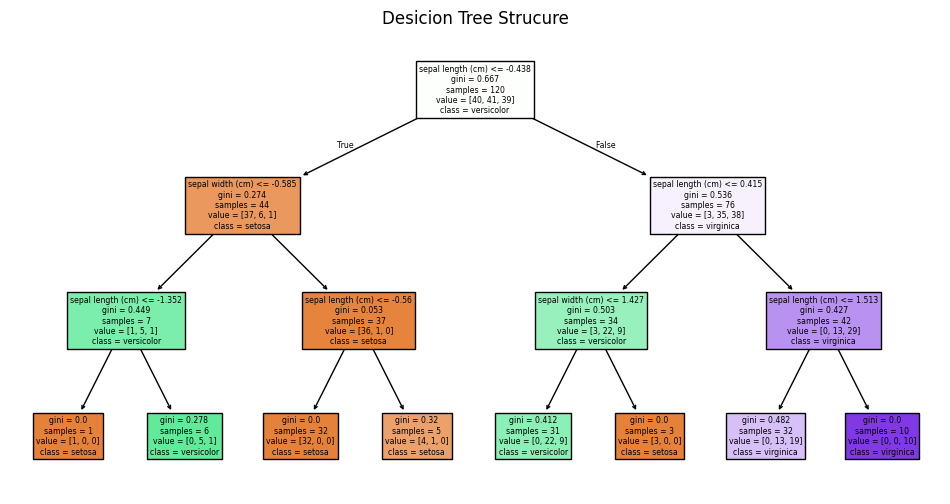

In [17]:
#confusion Matrix
fig , ax = plt.subplots(1,2,figsize=(10,4))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
plt.show()

#plot the desicion boundries
def plot_decision_boundries(model,X,y,title):
  X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.2),
                       np.arange(y_min, y_max, 0.2))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy , Z, alpha = 0.3)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
  plt.title(title)
  plt.show()

#Plot the decision boundries
plot_decision_boundries(log_reg, X_test, y_test, "Logistic Regression")
plot_decision_boundries(dt, X_test, y_test, "Decision Tree")


#Plot the decision tree structue
plt.figure(figsize=(12, 6))
plot_tree(dt, filled = True, feature_names = iris.feature_names[:2],class_names = iris.target_names)
plt.title("Desicion Tree Strucure")
plt.show()